# BMW - Machine Learning

In [382]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
bmw = pd.read_csv("BMW Used Car Sales/bmw.csv")

In [356]:
bmw.index.name = "id"
bmw.reset_index()

,id,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...,...
10776,10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


## Target Selection

In [357]:
target = bmw[["price"]]

In [358]:
target.head()

,price
id,
0,11200
1,27000
2,16000
3,12750
4,14500


In [359]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   10781 non-null  int64
dtypes: int64(1)
memory usage: 84.4 KB


## Feature Selection

In [360]:
fea_col = ["model", "transmission", "fuelType", "mileage", "tax"]

features = bmw[fea_col]

In [361]:
features.head()

,model,transmission,fuelType,mileage,tax
id,,,,,
0,5 Series,Automatic,Diesel,67068,125
1,6 Series,Automatic,Petrol,14827,145
2,5 Series,Automatic,Diesel,62794,160
3,1 Series,Automatic,Diesel,26676,145
4,7 Series,Automatic,Diesel,39554,160


In [362]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   model         10781 non-null  object
 1   transmission  10781 non-null  object
 2   fuelType      10781 non-null  object
 3   mileage       10781 non-null  int64 
 4   tax           10781 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 421.3+ KB


In [363]:
for col in ["model", "transmission", "fuelType"]:
    features[col] = features[col].astype("category")

# for col in ["mileage", "tax"]:
#     bmw_features[col] = bmw_features[col].astype("float")

/Users/royceto/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [364]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         10781 non-null  category
 1   transmission  10781 non-null  category
 2   fuelType      10781 non-null  category
 3   mileage       10781 non-null  int64   
 4   tax           10781 non-null  int64   
dtypes: category(3), int64(2)
memory usage: 201.2 KB


## Spliting Data

In [365]:
from sklearn.model_selection import train_test_split

In [366]:
# split into 3 datasets - train, validation and test

# tranvail (train + validation) & test dataset
# may or may not need stratify depend on labels
X_trainval, X_test, y_trainval, y_test = train_test_split(features, target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=42)

## Preprocessing and Pipeline

In [367]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [368]:
categorical = ["model",	"transmission",	"fuelType"]
numerical = ["mileage",	"tax"]

#pipelines to handle categorical and numeric data
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

#gluing back together - transform and concatenate features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat_pipe", cat_pipe, categorical),
        ("num_pipe", num_pipe, numerical)
    ]
)

#combine preprocessing and classifier together
pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regression", LinearRegression())
    ]
)

# Just in case, accessing steps in pipeline
# pipe.steps[0][1]

## Grid Search and CV

In [369]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

In [370]:
# regression and parameters

param_grid = [
    #Linear regression
    {
        "regression":[LinearRegression()],
        "preprocessor":[preprocessor]
    },
    #ridge
    {
        "regression":[Ridge()],
        "preprocessor":[preprocessor],
        "regression__alpha":[0.01, 0.1, 1, 10, 100,1000]
    },
    #lasso - (runtime very taxing)
    {
        "regression":[Lasso(max_iter=100000)],
        "preprocessor":[preprocessor],
        "regression__alpha":[0.01, 0.1, 1, 10, 100,1000]
    },
    #knn-regressor
    {
        "regression":[KNeighborsRegressor()],
        "preprocessor":[preprocessor],
        "regression__n_neighbors":[1,2,3,4,5,6,7,8,9,10]
    }
]

In [371]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_trainval, np.ravel(y_trainval))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['model',
                                                                          'transmission',
                                                                          'fuelTyp

In [372]:
print(
    "Test-set score {:5f}".format(grid.score(X_test, y_test))
)

print(
    "Best cross-validation score {:5f}".format(grid.best_score_)
)
print(
    "Best params: {}".format(grid.best_params_)
)
print(
    "Best best_estimator_{}".format(grid.best_estimator_)
)

Test-set score 0.865680
Best cross-validation score 0.856181
Best params: {'preprocessor': ColumnTransformer(transformers=[('cat_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['model', 'transmission', 'fuelType']),
                                ('num_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['mileage', 'tax'])]), 'regression': KNeighborsRegressor(), 'regression__n_neighbors': 5}
Best best_e

## Prediction

In [373]:
train_features_trans = preprocessor.fit_transform(features)
test_features_trans = preprocessor.transform(X_test)


In [374]:
X_test1 = X_test.reset_index()
X_test_id = X_test1.id

In [375]:
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(train_features_trans, np.ravel(target))

KNeighborsRegressor()

In [376]:
submission_pred = reg.predict(test_features_trans)

In [377]:
df_submit = pd.DataFrame(
    {
    "id":X_test_id.values,
    "price_pred":submission_pred
    }
)

In [378]:
# df_submit

In [379]:
merge1 = pd.merge(X_test1, df_submit, how="inner", on="id")

In [380]:
y_test1 = y_test.reset_index()

In [384]:
bmw_price_pred_actual = pd.merge(merge1, y_test1, how="inner", on="id")
bmw_price_pred_actual.head()

,id,model,transmission,fuelType,mileage,tax,price_pred,price
0,8728,1 Series,Manual,Diesel,36469,150,12974.4,15300
1,761,5 Series,Semi-Auto,Diesel,51565,160,18755.2,15495
2,7209,X3,Semi-Auto,Diesel,8988,150,33256.0,39875
3,6685,2 Series,Automatic,Petrol,5054,145,25791.2,21730
4,8548,2 Series,Manual,Diesel,13369,145,16177.4,13799


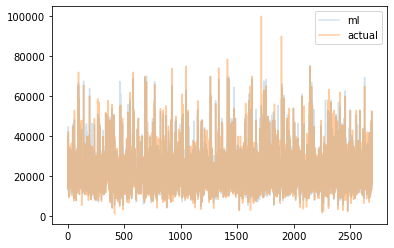

In [422]:
plt.plot(bmw_price_pred_actual.price_pred, label="ml", alpha=0.2)
plt.plot(bmw_price_pred_actual.price, label="actual", alpha=0.4)
plt.legend()

In [402]:
bmw_price_pred_actual["price_dff"] =  bmw_price_pred_actual["price_pred"] - bmw_price_pred_actual["price"]

In [412]:
bmw_price_pred_actual["price_per_change"] = (bmw_price_pred_actual["price_dff"] / bmw_price_pred_actual["price"])*100

In [413]:
bmw_price_pred_actual

,id,model,transmission,fuelType,mileage,tax,price_pred,price,price_dff,price_per_change
0,8728,1 Series,Manual,Diesel,36469,150,12974.4,15300,-2325.6,-15.200000
1,761,5 Series,Semi-Auto,Diesel,51565,160,18755.2,15495,3260.2,21.040336
2,7209,X3,Semi-Auto,Diesel,8988,150,33256.0,39875,-6619.0,-16.599373
3,6685,2 Series,Automatic,Petrol,5054,145,25791.2,21730,4061.2,18.689370
4,8548,2 Series,Manual,Diesel,13369,145,16177.4,13799,2378.4,17.236032
...,...,...,...,...,...,...,...,...,...,...
2691,9825,4 Series,Automatic,Petrol,3250,145,29043.0,25500,3543.0,13.894118
2692,3522,7 Series,Semi-Auto,Diesel,706,145,52190.4,52700,-509.6,-0.966983
2693,9757,3 Series,Automatic,Hybrid,64000,0,14863.4,15795,-931.6,-5.898069
2694,6100,4 Series,Automatic,Diesel,6000,145,30041.0,29840,201.0,0.673592


In [415]:
bmw_price_pred_actual["price_per_change"].describe()

count    2696.000000
mean        2.725352
std        17.874319
min       -44.787994
25%        -5.876244
50%         0.796288
75%         8.086049
max       353.666667
Name: price_per_change, dtype: float64

(array([  1.,  14.,  59., 195., 475., 847., 593., 262., 114.,  57.,  25.,
         22.,  10.,   6.,   3.,   0.,   0.,   2.,   2.,   1.,   1.,   0.,
          2.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-44.787994  , -36.81890078, -28.84980757, -20.88071436,
        -12.91162114,  -4.94252793,   3.02656528,  10.9956585 ,
         18.96475171,  26.93384492,  34.90293814,  42.87203135,
         50.84112456,  58.81021778,  66.77931099,  74.7484042 ,
         82.71749742,  90.68659063,  98.65568384, 106.62477706,
        114.59387027, 122.56296348, 130.5320567 , 138.50114991,
        146.47024312, 154.43933633, 162.40842955, 170.37752276,
        178.34661597, 186.31570919, 194.2848024 , 202.25389561,
        210.22298883, 218.19208204, 226.16117525, 234.13026847,
        242.09936168, 250.06845489, 258.03754811, 266.00664132,
        273.975734

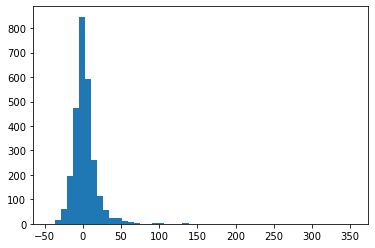

In [420]:
plt.hist(bmw_price_pred_actual["price_per_change"], bins=50)

In [425]:
perct_less100 = bmw_price_pred_actual.loc[bmw_price_pred_actual["price_per_change"]<=100,:]

(array([  1.,   0.,   0.,   4.,   4.,   9.,   7.,  28.,  38.,  51.,  65.,
        114., 125., 198., 232., 301., 295., 278., 221., 177., 115., 105.,
         68.,  52.,  38.,  31.,  33.,  14.,  13.,   3.,  14.,  10.,  10.,
          7.,   3.,   2.,   4.,   5.,   3.,   1.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([-44.787994  , -42.03660807, -39.28522215, -36.53383623,
        -33.7824503 , -31.03106438, -28.27967846, -25.52829253,
        -22.77690661, -20.02552069, -17.27413476, -14.52274884,
        -11.77136292,  -9.01997699,  -6.26859107,  -3.51720515,
         -0.76581922,   1.9855667 ,   4.73695262,   7.48833855,
         10.23972447,  12.99111039,  15.74249632,  18.49388224,
         21.24526816,  23.99665409,  26.74804001,  29.49942593,
         32.25081186,  35.00219778,  37.7535837 ,  40.50496963,
         43.25635555,  46.00774147,  48.7591274 ,  51.51051332,
         54.26189924,  57.01328517,  59.76467109,  62.51605701,
         65.267442

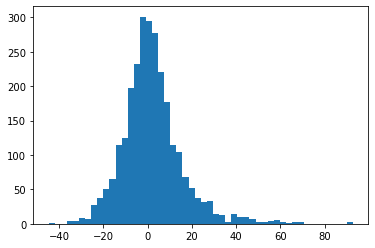

In [427]:
plt.hist(perct_less100["price_per_change"], bins=50)